In [1]:
from edmunds import parse_edmunds
from cars import parse_cars
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def best_cars(df, n=3):
    """Returns n best cars from dataframe with cars"""
    x = df.miles
    y = df.price
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    fit = lambda z: slope*z + intercept
    # Determine the best car
    best = {}
    for mile, price in zip(x,y):
        if price >= 11000: continue
        if price >= fit(mile):
            continue
        best[mile] = fit(mile) - price

    best = {k: v for k, v in sorted(best.items(), 
                                    key=lambda item: item[1], 
                                    reverse=True)}
    result = [df[df.eq(list(best.keys())[x]).any(axis=1)].url for x in range(n)]
    pd.set_option('display.max_colwidth', None)
    fig, ax = plt.subplots()
    ax.plot(x, fit(x))
    scatter = ax.scatter(df.miles, df.price, c=df.year)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Year")
    ax.set_xlabel('Miles')
    ax.set_ylabel('Price')
    ax.add_artist(legend1)
    [print(x) for x in result]

In [7]:
years = [2009,2010,2011, 2012, 2013]
model = 'accord'
radius = 100

In [8]:
edmunds = parse_edmunds(years = years, model=model, radius=radius)
cars = parse_cars(years = years, model=model, radius=radius)
frames = [edmunds, cars]
main = pd.concat(frames)

52    https://www.edmunds.com/honda/accord/2011/vin/1HGCP2F32BA155475/?radius=100
Name: url, dtype: object
18    https://www.cars.com/vehicledetail/09ebcf13-d5bb-470a-9647-26217722a7a8/
Name: url, dtype: object
27    https://www.edmunds.com/honda/accord/2010/vin/1HGCP2F39AA162051/?radius=100
Name: url, dtype: object
38    https://www.edmunds.com/honda/accord/2010/vin/1HGCP2F81AA170253/?radius=100
Name: url, dtype: object
23    https://www.edmunds.com/honda/accord/2010/vin/1HGCS1B3XAA016840/?radius=100
Name: url, dtype: object
14    https://www.edmunds.com/honda/accord/2009/vin/1HGCP36859A035326/?radius=100
Name: url, dtype: object
68    https://www.edmunds.com/honda/accord/2011/vin/1HGCP2F36BA086628/?radius=100
Name: url, dtype: object
4    https://www.edmunds.com/honda/accord/2009/vin/JHMCP26899C003409/?radius=100
Name: url, dtype: object
289    https://www.edmunds.com/honda/accord/2013/vin/1HGCT1B89DA014123/?radius=100
Name: url, dtype: object
54    https://www.edmunds.com/honda/acco

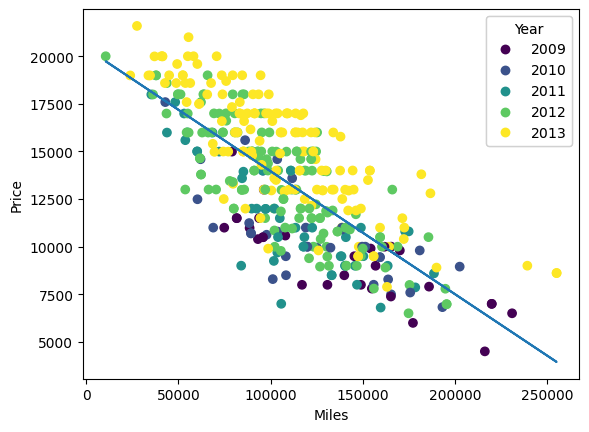

In [9]:
best_cars(main, n =10)